In [1]:
import f3dasm 

from rvesimulator.additionals.ampitudesampler import AmplitudeGenerator
from rvesimulator.cases.cddm_rve import CDDMRVE
from matplotlib import pyplot as plt 

2023-04-03 19:44:13,791 - Imported f3dasm
2023-04-03 19:44:15.321424: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-03 19:44:15.365492: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 19:44:16.185862: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-03 19:44:16,872 - None



f3dasm:
       f3dasm: No __version__ attribute!

System:
    python: 3.10.5 | packaged by conda-forge | (main, Jun 14 2022, 07:04:59) [GCC 10.3.0]
executable: /home/jiaxiangyi/anaconda3/envs/f3dasm_env/bin/python
   machine: Linux-5.19.0-38-generic-x86_64-with-glibc2.35

Core package dependencies:
        numpy: 1.23.1
        scipy: 1.9.0
       pandas: 1.4.3
   matplotlib: 3.5.2
       pathos: 0.3.0
        hydra: 1.3.2
     autograd: No __version__ attribute!

Machine learning extension:
   tensorflow: 2.12.0

Optimization extension:
       GPyOpt: 1.2.6
          GPy: 1.10.0
   tensorflow: 2.12.0
        pygmo: 2.19.0

Sampling extension:
        SALib: 1.4.5


In [2]:

path_sampler = AmplitudeGenerator(num_dim=3)
paths = path_sampler.get_amplitude(
    num_amplitude=2,
    num_control=8,
    num_steps=100,
    arg_name="strain_amplitude",
    seed=1,
)
samples_dict = paths.to_dict("records")

In [3]:
#
simulator = CDDMRVE()
simulator.update_sim_info(
    hardening_law="swift",
    yield_stress=0.5,
    a=0.2,
    b=0.4,
    print_info=True,
    num_steps=100,
    simulation_time=1.0,
    strain=[0.02, 0.02, 0.02],
    num_cpu=6,
)



Simulation information: 

{
    "length": 0.048,
    "width": 0.048,
    "radius_mu": 0.003,
    "radius_std": 0.0,
    "vol_req": 0.3,
    "vol_frac": 0.3067961575771284,
    "mesh_partition": 100,
    "strain": [
        0.02,
        0.02,
        0.02
    ],
    "strain_amplitude": null,
    "simulation_time": 1.0,
    "num_steps": 100,
    "num_cpu": 6,
    "platform": "ubuntu",
    "hardening_law": "swift",
    "hardening paras": {
        "yield_stress": 0.5,
        "a": 0.2,
        "b": 0.4
    },
    "E_matrix": 100.0,
    "Pr_matrix": 0.3,
    "E_fiber": 1.0,
    "Pr_fiber": 0.19
}


In [4]:
# calculate the initial responses of simulation
results = {}
for ii in range(len(samples_dict)):
    results[ii] = simulator.run_simulation(
        sample=samples_dict[ii], third_folder_index=ii
    )



/home/jiaxiangyi/Documents/abaqusrve/toturials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<24 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :295.004549 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<24 out of 30 licenses remain available>.


/home/jiaxiangyi/Documents/abaqusrve/toturials/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<24 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :245.004467 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<25 out of 30 licenses remain available>.


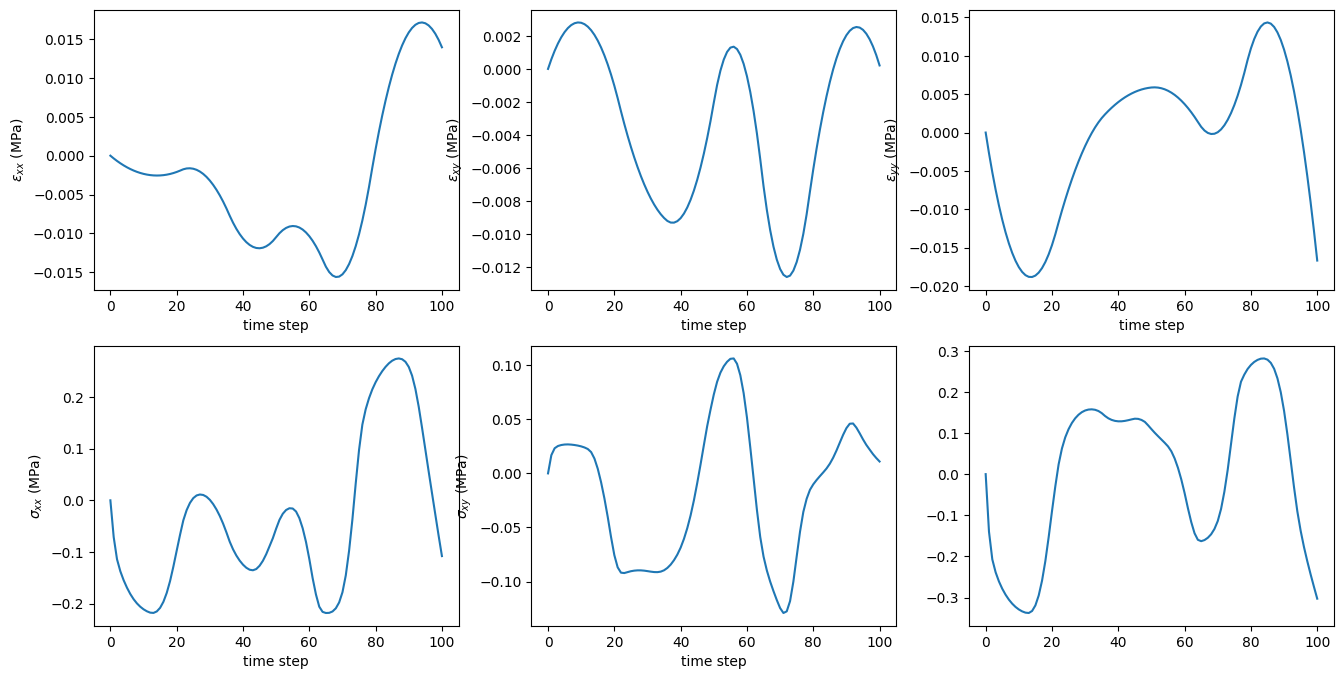

In [13]:
index = 1 
fig, ax = plt.subplots(2,3, figsize =(16, 8))
pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xx}$ (MPa)")
ax[0,0].plot(
    results[index]["strain"][:, 0, 0],
)
ax[0,0].set(**pparam)
pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{xy}$ (MPa)")
ax[0,1].plot(
    results[index]["strain"][:, 0, 1],
)
ax[0,1].set(**pparam)
pparam = dict(xlabel="time step", ylabel=r"$\varepsilon_{yy}$ (MPa)")
ax[0,2].plot(
    results[index]["strain"][:, 1, 1],
)
ax[0,2].set(**pparam)

pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xx}$ (MPa)")
ax[1,0].plot(
    results[index]["stress"][:, 0, 0],
)
ax[1,0].set(**pparam)
pparam = dict(xlabel="time step", ylabel=r"$\sigma_{xy}$ (MPa)")
ax[1,1].plot(
    results[index]["stress"][:, 0, 1],
)
ax[1,1].set(**pparam)
pparam = dict(xlabel="time step", ylabel=r"$\sigma_{yy}$ (MPa)")
ax[1,2].plot(
    results[index]["stress"][:, 1, 1],

)
plt.show()